In [32]:
import csv
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
with open('spambasedata.csv.data') as f:
        reader = csv.reader(f, delimiter=',')
        data = np.array(list(reader)).astype(float)

indices = list(range(0,len(data)))
testAndValidation, trainingData = train_test_split(indices, test_size = 0.5)
halfTrainingData, otherHalf = train_test_split(trainingData, test_size = 0.5)
testData, validationData = train_test_split(testAndValidation, test_size = 0.5)

np.stack(trainingData)
np.stack(testData)
np.stack(validationData)
np.stack(halfTrainingData)

Xtrain = data[trainingData,:57]
Ytrain = data[trainingData,-1:]

Xtrain2 = data[halfTrainingData,:57]
Ytrain2 = data[halfTrainingData,-1:]

Xvalidation = data[validationData,:57]
Yvalidation = data[validationData,-1:]

Xtest = data[testData,:57]
Ytest = data[testData,-1:]

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Decision Tree Classifier
treeDepth = []
treeAccuracy = []
maxDepth = 0;
maxAcc = 0;
# loop for validating the tree with 27 iterations and validation data fo finding the hyperparemeters
for i in range(1, 27, 1):
    # the tree is initialized
    classifier = tree.DecisionTreeClassifier(random_state=0, max_depth=i)
    # the tree is trained
    classifier = classifier.fit(Xtrain, Ytrain)
    # a prediction is made with the validation set
    tree_prediction = classifier.predict(Xvalidation)
    # the score for this prediction is calculated
    score = accuracy_score(tree_prediction, Yvalidation)
    # the maximun score and its tree depth stored
    if score > maxAcc:
        maxAcc = score
        maxDepth = i
    treeDepth.append(i)
    treeAccuracy.append(score)
    
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)
ax.scatter(treeDepth, treeAccuracy)
ax.plot(treeDepth, treeAccuracy)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title('Accuracies per tree depth', color='white')
plt.xlabel('Tree Depth', color='white')
plt.ylabel('Tree Accuracy', color='white')
for a,b in zip(treeDepth, treeAccuracy): 
    plt.text(a, b, str(round(b, 3)))
plt.show()
print('Maximum Accuracy:',maxAcc)
print('For depth:',maxDepth)

<Figure size 1800x300 with 1 Axes>

Maximum Accuracy: 0.92
For depth: 17


In [3]:
classifier = tree.DecisionTreeClassifier(random_state=0, max_depth=14)
classifier = classifier.fit(Xtrain, Ytrain)
tree_prediction = classifier.predict(Xtest)
score = accuracy_score(tree_prediction, Ytest)
print('Accuracy:',score)

Accuracy: 0.9069565217391304


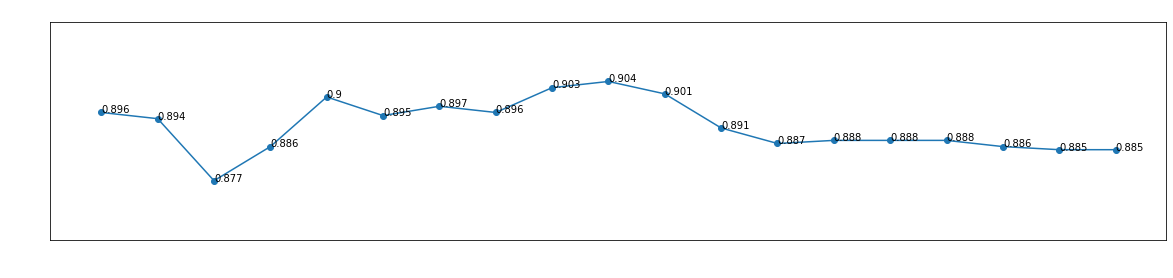

Maximum Accuracy: 0.9043478260869565
Number of classifiers: 10


In [26]:
# AdaBoost.M1.validate
treeDepth = 1
NClassifiers = []
treeAccuracy = []
maxClassifier = 0;
maxAcc = 0;

trainSize = Xtrain2.shape[0]
validationSize = Xvalidation.shape[0]
classifierAda = tree.DecisionTreeClassifier(random_state=0, max_depth=14)
for k in range(1, 20):

    addedClassifiers = np.full((validationSize), 0.0)
    Weights = np.full(trainSize, 1/trainSize)
    n = 0
    for observation in range(k):
        n += 1
        classifierAda.fit(Xtrain2, Ytrain2, sample_weight = Weights)
        prediction = classifierAda.predict(Xvalidation)
        incorrect = (prediction != Yvalidation)
        incorrectWeightsSum = 0;
        for i in range(len(incorrect)):
            
            if np.take(incorrect, i):
                incorrectWeightsSum += Weights[i]
        error = 1-accuracy_score(prediction,Yvalidation)       
        alpha = np.log( (1 - error) / error)
        for j in range(len(incorrect)):
            if np.take(incorrect, j):
                Weights[j] = Weights[j]*np.exp(alpha)
        
        prediction = np.multiply(prediction, alpha)
        addedClassifiers = [sum(x) for x in zip(prediction, addedClassifiers)]
        
    addedClassifiers = np.divide(addedClassifiers, n)

    for i in range(len(addedClassifiers)):
        
        if(addedClassifiers[i]<0.5):
            addedClassifiers[i] = 0
        else:
            addedClassifiers[i] = 1
            
    score = accuracy_score(addedClassifiers, Yvalidation)
    
    if score > maxAcc:
        maxAcc = score
        maxClassifier = k
    NClassifiers.append(k)
    treeAccuracy.append(score)
    
fig = plt.figure(figsize=(20, 4))
ax = fig.add_subplot(111)
ax.scatter(NClassifiers, treeAccuracy)
ax.plot(NClassifiers, treeAccuracy)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title('Accuracies per number of classifiers', color='white')
plt.xlabel('Number of classifiers', color='white')
plt.ylabel('Tree Accuracy', color='white')
for a,b in zip(NClassifiers, treeAccuracy): 
    plt.text(a, b, str(round(b, 3)))
plt.show()
print('Maximum Accuracy:',maxAcc)
print('Number of classifiers:',maxClassifier)


In [33]:
# AdaBoost.M1.validate
treeDepth = 1
NClassifiers = []
treeAccuracy = []
maxClassifier = 0;
maxAcc = 0;

trainSize = Xtrain2.shape[0]
validationSize = Xvalidation.shape[0]
classifierAda = tree.DecisionTreeClassifier(random_state=0, max_depth=14)

addedClassifiers = np.full((validationSize), 0.0)
Weights = np.full(trainSize, 1/trainSize)
n = 0
for observation in range(10):
    n += 1
    classifierAda.fit(Xtrain2, Ytrain2, sample_weight = Weights)
    prediction = classifierAda.predict(Xtest)
    incorrect = (prediction != Ytest)
    incorrectWeightsSum = 0;
    for i in range(len(incorrect)):
            
        if np.take(incorrect, i):
            incorrectWeightsSum += Weights[i]
    error = 1-accuracy_score(prediction,Ytest)       
    alpha = np.log( (1 - error) / error)
    for j in range(len(incorrect)):
        if np.take(incorrect, j):
            Weights[j] = Weights[j]*np.exp(alpha)
        
    prediction = np.multiply(prediction, alpha)
    addedClassifiers = [sum(x) for x in zip(prediction, addedClassifiers)]
        
addedClassifiers = np.divide(addedClassifiers, n)

for i in range(len(addedClassifiers)):
        
    if(addedClassifiers[i]<0.5):
        addedClassifiers[i] = 0
    else:
        addedClassifiers[i] = 1
            
score = accuracy_score(addedClassifiers, Ytest)
    

print('Accuracy:',score)


Accuracy: 0.9113043478260869


In [31]:
# AdaBoost.M1.validate
maxClassifier = 0;
maxAcc = 0;

NClassifiers = []
treeAccuracy = []
    
trainSize = Xtrain2.shape[0]
validationSize = Xvalidation.shape[0]

classifierAda = tree.DecisionTreeClassifier(random_state=0, max_depth=1)
for k in range(1, 30):
    addedClassifiers = np.full((validationSize), 0.0)
    Weights = np.full(trainSize, 1/trainSize)
    n = 0
    for observation in range(k):
        n += 1
        classifierAda.fit(Xtrain2, Ytrain2, sample_weight = Weights)
        prediction = classifierAda.predict(Xvalidation)
        incorrect = (prediction != Yvalidation)
                    
        error = 1-accuracy_score(Yvalidation, prediction)       
        alpha = np.log( (1 - error) / error)
            
        for j in range(len(incorrect)):
                
            if np.take(incorrect, j):
                Weights[j] = Weights[j]*np.exp(alpha)

        prediction = np.multiply(prediction, alpha)
        addedClassifiers = [sum(x) for x in zip(prediction, addedClassifiers)]

        addedClassifiers = np.divide(addedClassifiers, n)

        for i in range(len(addedClassifiers)):

            if(addedClassifiers[i]<0.5):
                addedClassifiers[i] = 0
            else:
                addedClassifiers[i] = 1

        score = accuracy_score(addedClassifiers, Yvalidation)

        if score > maxAcc:
            maxAcc = score
            maxClassifier = k
            
print('Maximum Accuracy:',maxAcc)
print('Number of classifiers:',maxClassifier)


Maximum Accuracy: 0.7913043478260869
Number of classifiers: 2


In [27]:
# AdaBoost.M1.test
def normalize(probs):
    norm = [float(i)/sum(probs) for i in probs]
    return norm
def changeSigns(arr):
    lista = [-1 if x==0 else 1 for x in arr]
    return lista
def FlipSigns(arr):
    lista = [1 if x==0 else 0 for x in arr]
    return lista
trainSize = Xtrain2.shape[0]
testSize = Xtest.shape[0]
addedClassifiers = np.full((testSize), 0.0)
Weights = np.full(trainSize, 1/trainSize)
for observation in range(0,20):

    Weights = normalize(Weights)
    classifierAda = tree.DecisionTreeClassifier(random_state=0, max_depth=1)
    classifierAda.fit(Xtrain2, Ytrain2, sample_weight = Weights)
    prediction = classifierAda.predict(Xtest)
    incorrect = (prediction != Ytest)
    incorrectWeightsSum = 0;
    g = 0
    for i in range(len(incorrect)):
        if np.take(incorrect, i):
            g += 1
            incorrectWeightsSum += Weights[i]
    print(g)
    
    error = incorrectWeightsSum/np.sum(Weights)
    error = 1-accuracy_score(Ytest, prediction)     
    alpha = np.log( (1 - error) / error)
    for j in range(len(incorrect)):
            
        if np.take(incorrect, j):
            Weights[j] = Weights[j]*np.exp(alpha)

    prediction = changeSigns(prediction)
    prediction = np.multiply(prediction, alpha)
    addedClassifiers = [sum(x) for x in zip(prediction, addedClassifiers)]
    
preds = (np.array(np.sign(addedClassifiers)))
print('Accuracy = ', accuracy_score(preds, changeSigns(Ytest) ))


705
705
705
705
705
705
705
705
705
705
705
705
705
705
705
705
705
705
705
705
Accuracy =  0.7843478260869565


C:\Users\Propietario\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


--- 42.734607458114624 seconds ---


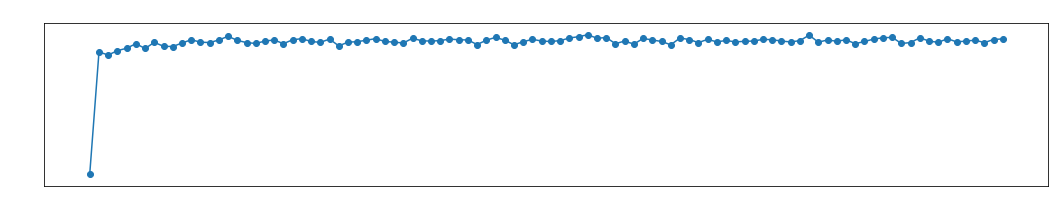

Maximum Accuracy: 0.9547826086956521
For number of bags: 54
Sample size (63% size of data): 724


In [95]:
# Bagging Validate
NBags = []
BagsAccuracy = []
maxBag = 0;
maxAcc = 0;

sampleSize = int(Xvalidation.shape[0]*0.63)

start_time = time.time()
# for loop for validation
for maxbagging in range(0,100):
    totalResults = np.array(np.full(Xvalidation.shape[0], 0))
    ValidationRows = np.random.randint(Xvalidation.shape[0], size=Xvalidation.shape[0])
    XsampleValidate = Xvalidation[ValidationRows,:]
    YsampleValidate = Yvalidation[ValidationRows]
    # Bagging as done with multiple repetitions
    for i in range(maxbagging):
        # Here a random sample from the training data is taken
        randomRowsTraining = np.random.randint(Xtrain.shape[0], size=sampleSize)
        XsampleTrain = Xtrain[randomRowsTraining,:]
        YsampleTrain = Ytrain[randomRowsTraining]
        # As before, a simple decision tree was used
        classifierBagging = tree.DecisionTreeClassifier(random_state=1, max_depth=14)
        classifierBagging = classifierBagging.fit(XsampleTrain, YsampleTrain)
        tree_prediction = classifierBagging.predict(XsampleValidate)
        auxMatrix = [totalResults, np.array(tree_prediction)]
        # The results for each sample is added to the total and then, the concensus is taken
        totalResults = np.sum(auxMatrix, axis=0)

    totalResults = np.divide(totalResults, maxbagging)
    # This is the way in which the concensus was calculated
    for i in range(len(totalResults)):

        if(totalResults[i]<0.5):
            totalResults[i] = 0
        else:
            totalResults[i] = 1

    score = accuracy_score(totalResults, YsampleValidate)

    if score > maxAcc:
        maxAcc = score
        maxBag = maxbagging
    NBags.append(maxbagging)
    BagsAccuracy.append(score)
print("--- %s seconds ---" % (time.time() - start_time))
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)
ax.scatter(NBags, BagsAccuracy)
ax.plot(NBags, BagsAccuracy)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title('Accuracies per number of baggings', color='white')
plt.xlabel('Number of baggings', color='white')
plt.ylabel('Accuracy', color='white')
#for a,b in zip(NBags, BagsAccuracy): 
#    plt.text(a, b, str(round(b, 3)))
plt.show()
print('Maximum Accuracy:',maxAcc)
print('For number of bags:',maxBag)
print('Sample size (63% size of data):',sampleSize)

In [96]:
# Bagging Test
baggingNumber = 54
sampleSize = int(Xtest.shape[0]*0.63)
totalResults = np.array(np.full(Xtest.shape[0], 0))

TestingRows = np.random.randint(Xtest.shape[0], size=Xtest.shape[0])
XsampleTest = Xtest[TestingRows,:]
YsampleTest = Ytest[TestingRows]

for i in range(baggingNumber):
    
    randomRowsTraining = np.random.randint(Xtrain.shape[0], size=sampleSize)
    XsampleTrain = Xtrain[randomRowsTraining,:]
    YsampleTrain = Ytrain[randomRowsTraining]
    
    classifierBagging = tree.DecisionTreeClassifier(random_state=1, max_depth=10)
    classifierBagging = classifierBagging.fit(XsampleTrain, YsampleTrain)
    tree_prediction = classifierBagging.predict(XsampleTest)
    auxMatrix = [totalResults, np.array(tree_prediction)]
    totalResults = np.sum(auxMatrix, axis=0)

totalResults = np.divide(totalResults, baggingNumber)

for i in range(len(totalResults)):
    
    if(totalResults[i]<0.5):
        totalResults[i] = 0
    else:
        totalResults[i] = 1

score = accuracy_score(totalResults, YsampleTest)
print('Accuracy:',score)

Accuracy: 0.9347826086956522
